# <font color=green>Resultados - GA Árvore de Steiner</font>

## Importação de dados:

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,7)
np.set_printoptions(precision=9)

dirBase = os.getcwd() + "/"
dirSol = dirBase + "grafos/solucoes/"
dirSaida = dirBase + "tst_delaunay/"
#dirSaida = dirBase + "saida/"

In [10]:
pontos = ['10','20','30','40','50','60','70','80','90','100']#,'250','500','1000']
qtdPt = len(pontos)
qtdInst = 15
qtdTst = 30

solucao = np.zeros((qtdPt, qtdInst, 2))        # Ponto, instancia, smt e mst
teste = np.zeros((qtdPt, qtdInst, qtdTst, 2))  # Ponto, instancia, teste, smt e tempo de execução

In [11]:
for iPt in range(qtdPt):
    pt = pontos[iPt]
    for iInst in range(qtdInst):
        arq = pt + "." + str(iInst + 1)
        arqSol = dirSol + "estein" + arq
        
        # Abre arquivo de solução
        sol = open(arqSol, 'r')
        solucao[iPt][iInst][0] = float(sol.readline())  # smt da solução
        solucao[iPt][iInst][1] = float(sol.readline())  # mst da solução
        sol.close()
        
        for iTst in range(qtdTst):
            arqTeste = dirSaida + arq + "_tst" + str(iTst + 1)
            
            # Abre arquivo com dados do teste
            sai = open(arqTeste, 'r')
            sai.readline()                                      # dir do problema
            teste[iPt][iInst][iTst][1] = float(sai.readline())  # tempo de execucao
            sai.readline()                                      # parametros utilizados
            teste[iPt][iInst][iTst][0] = float(sai.readline())  # smt do teste
            sai.close()

## Média de distância por ponto:

Pontos	Teste		Ótimo		% Diferença
10	1.942215353	1.942215349	0.000000204
20	2.878101734	2.878101750	-0.000000551
30	3.593338434	3.593073382	0.007376746
40	4.311898359	4.311739882	0.003675480
50	4.698498476	4.698293543	0.004361859
60	5.016974826	5.016418499	0.011090105
70	5.480173641	5.479394647	0.014216795
80	5.924996053	5.922725505	0.038336201
90	6.219895153	6.217427048	0.039696574
100	6.628555049	6.623445917	0.077137059


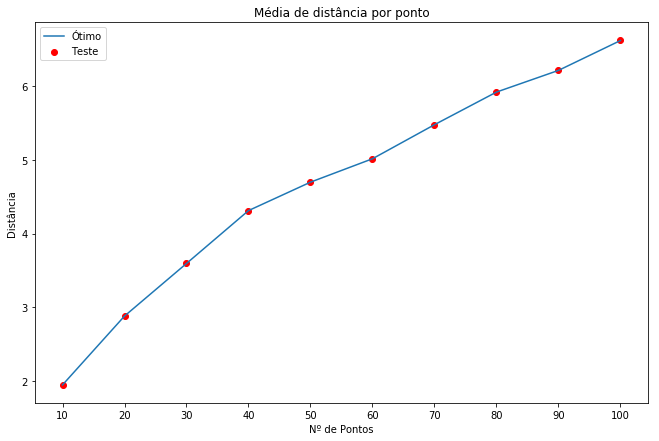

In [12]:
# Tabela
print ("Pontos\tTeste\t\tÓtimo\t\t% Diferença")
mediaTst = [0] * qtdPt # Gráfico Y
mediaSol = [0] * qtdPt # Gráfico Y
for iPt in range(qtdPt):
    mediaTst[iPt] = teste[iPt][...][...,0].mean()   # Média do teste
    mediaSol[iPt] = solucao[iPt][...,0].mean()      # Média da solução (ótimo)
    dif =  mediaTst[iPt] - mediaSol[iPt]
    reducao = (dif * 100) / mediaSol[iPt]           # Percentual de redução
    print (pontos[iPt] + "\t" + "{:.9f}".format(mediaTst[iPt]) + "\t" + "{:.9f}".format(mediaSol[iPt]) + "\t" + "{:.9f}".format(reducao))

# Gráfico
plt.scatter(pontos, mediaTst, c='red', label='Teste')
plt.plot(pontos, mediaSol, label='Ótimo')
plt.xlabel('Nº de Pontos')
plt.ylabel('Distância')
plt.title('Média de distância por ponto')
plt.legend()
plt.show()

## Média de tempo por ponto:

Pontos	Tempo de Execução (s)
10	0.5
20	1.5
30	8.1
40	28.8
50	42.3
60	87.7
70	147.4
80	221.3
90	318.9
100	366.2


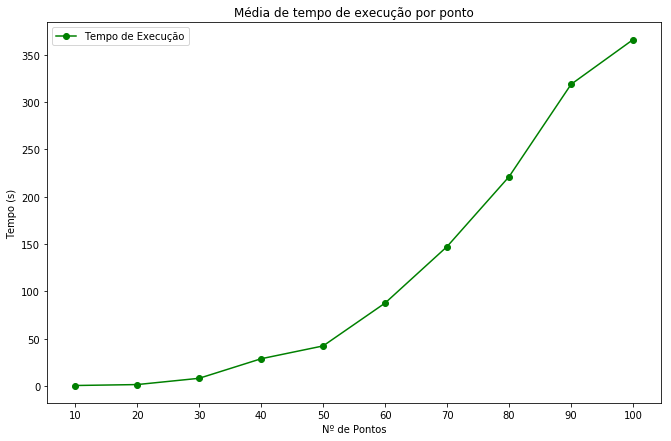

In [13]:
# Tabela
print ("Pontos\tTempo de Execução (s)")
mediaTstCPU = [0] * qtdPt # Gráfico Y
for iPt in range(qtdPt):
    mediaTstCPU[iPt] = teste[iPt][...][...,1].mean()   # Média de tempo do teste
    print (pontos[iPt] + "\t" + "{:.1f}".format(mediaTstCPU[iPt]))
    
# Gráfico
plt.plot(pontos, mediaTstCPU, marker='o', c='green', label='Tempo de Execução')
plt.xlabel('Nº de Pontos')
plt.ylabel('Tempo (s)')
plt.title('Média de tempo de execução por ponto')
plt.legend()
plt.show()

## Média percentual de redução por ponto:

Pontos	Máximo Tst.	Média Tst.	Média Opt.
10	3.25%		3.25% ± 0.000	3.25%
20	3.16%		3.16% ± 0.000	3.16%
30	3.07%		3.06% ± 0.057	3.07%
40	3.14%		3.14% ± 0.018	3.14%
50	3.03%		3.03% ± 0.010	3.03%
60	3.27%		3.26% ± 0.024	3.27%
70	3.11%		3.10% ± 0.031	3.11%
80	3.03%		3.00% ± 0.032	3.04%
90	3.11%		3.08% ± 0.033	3.12%
100	3.25%		3.19% ± 0.045	3.27%


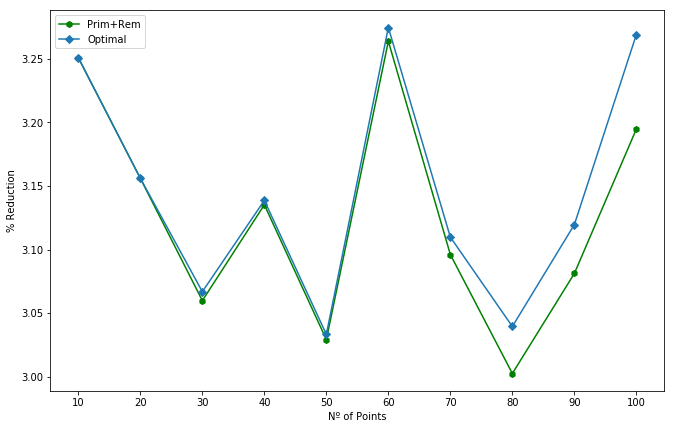

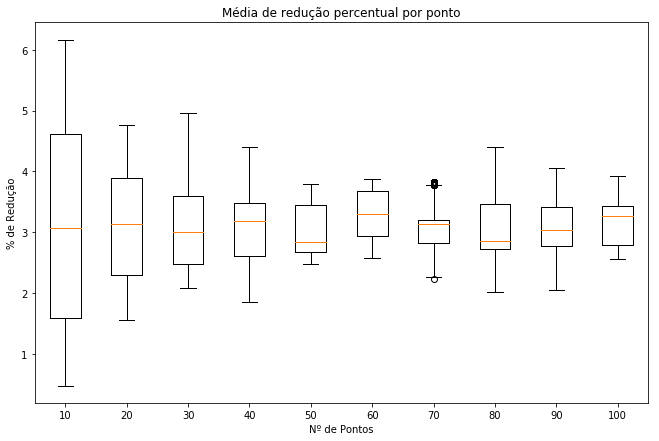

In [14]:
# Calcula % de redução
redSolucao = np.zeros((qtdPt, qtdInst))        # Ponto, instancia, % de redução da smt da solução
redTeste = np.zeros((qtdPt, qtdInst, qtdTst))  # Ponto, instancia, % de redução da smt do teste
for iPt in range(qtdPt):
    for iInst in range(qtdInst):
        smtSol = solucao[iPt][iInst][0]        # SMT da solução
        mstSol = solucao[iPt][iInst][1]        # MST da solução
        redSolucao[iPt][iInst] = ((mstSol - smtSol) * 100) / mstSol   # % de redução da Solução
        for iTst in range(qtdTst):
            smtTeste = teste[iPt][iInst][iTst][0]        # SMT do teste
            redTeste[iPt][iInst][iTst] = ((mstSol - smtTeste) * 100) / mstSol   # % de redução do teste

# Tabela
mediaRedTst = [0] * qtdPt # Gráfico Y
mediaRedSol = [0] * qtdPt # Gráfico Y
print ("Pontos\tMáximo Tst.\tMédia Tst.\tMédia Opt.")
for iPt in range(qtdPt):
    mediaRedSol[iPt] = redSolucao[iPt][...].mean()
    mediaRedTst[iPt] = redTeste[iPt][...][...].mean()
    redMaxTst = np.zeros((qtdInst))
    somaDesvInst = 0
    for iInst in range(qtdInst):
        redMaxTst[iInst] = redTeste[iPt][iInst][...].max()  # Máximo por instâncias
        mediaInst = redTeste[iPt][iInst][...].mean()        # Média por instância
        for iTst in range(qtdTst):
            somaDesvInst += (redTeste[iPt][iInst][iTst] - mediaInst) ** 2
    mediaRedMaxTst = redMaxTst.mean()
    desvPadTst = np.sqrt(somaDesvInst / ((qtdInst - 1) * qtdInst))
    print (pontos[iPt] + "\t" + "{:.2f}".format(mediaRedMaxTst) + "%\t\t" + 
           "{:.2f}".format(mediaRedTst[iPt]) + "% ± "+"{:.3f}".format(desvPadTst) + "\t" + 
           "{:.2f}".format(mediaRedSol[iPt]) + "%")
    
# Dados do Box
dadosBox = []
for iPt in range(qtdPt):
    dadosBox.append(redTeste[iPt][...][...].flatten())

# Gráfico
#plt.scatter(pontos, mediaRedTst, c='red', label='Teste')
plt.plot(pontos, mediaRedTst, c='green', label='Prim+Rem', marker="h")
plt.plot(pontos, mediaRedSol, label='Optimal', marker="D")
plt.xlabel('Nº of Points')
plt.ylabel('% Reduction')
#plt.title('Média de redução percentual por ponto')
plt.legend()
plt.show()

# Gráfico
plt.boxplot(dadosBox, labels=pontos)
plt.xlabel('Nº de Pontos')
plt.ylabel('% de Redução')
plt.title('Média de redução percentual por ponto')
plt.show()

In [15]:
print ("Pontos\tInst.\tMax.\tMédia\tMédia Opt.\n----------------------------------")
for iPt in range(qtdPt):
    for iInst in range(qtdInst):
        mediaRedSol = redSolucao[iPt][iInst].mean()
        mediaRedInst = redTeste[iPt][iInst][...].mean()
        maxRedInst = redTeste[iPt][iInst][...].max()
        atencao = "<-" if (mediaRedInst < mediaRedSol) else ""
        print(pontos[iPt] + "\t" + "{:02d}".format(iInst+1) + "\t" + 
              "{:.2f}".format(maxRedInst) + "%\t" + 
              "{:.2f}".format(mediaRedInst) + "%\t" + 
              "{:.2f}".format(mediaRedSol) + "%\t" + atencao)
    print("----------------------------------")

Pontos	Inst.	Max.	Média	Média Opt.
----------------------------------
10	01	4.30%	4.30%	4.30%	<-
10	02	0.48%	0.48%	0.48%	<-
10	03	4.38%	4.38%	4.38%	
10	04	1.15%	1.15%	1.15%	
10	05	2.46%	2.46%	2.46%	<-
10	06	4.61%	4.61%	4.61%	<-
10	07	4.43%	4.43%	4.43%	<-
10	08	1.59%	1.59%	1.59%	
10	09	2.49%	2.49%	2.49%	<-
10	10	1.98%	1.98%	1.98%	
10	11	5.49%	5.49%	5.49%	<-
10	12	0.58%	0.58%	0.58%	<-
10	13	6.17%	6.17%	6.17%	
10	14	5.60%	5.60%	5.60%	<-
10	15	3.07%	3.07%	3.07%	
----------------------------------
20	01	4.39%	4.39%	4.39%	
20	02	2.30%	2.30%	2.30%	
20	03	3.73%	3.73%	3.73%	
20	04	2.79%	2.79%	2.79%	<-
20	05	3.89%	3.89%	3.89%	
20	06	2.77%	2.77%	2.77%	<-
20	07	2.10%	2.10%	2.10%	
20	08	4.76%	4.76%	4.76%	
20	09	1.55%	1.55%	1.55%	
20	10	3.57%	3.57%	3.57%	<-
20	11	3.01%	3.01%	3.01%	
20	12	4.37%	4.37%	4.37%	<-
20	13	3.13%	3.13%	3.13%	
20	14	3.34%	3.34%	3.34%	<-
20	15	1.64%	1.64%	1.64%	
----------------------------------
30	01	2.19%	2.19%	2.19%	
30	02	2.76%	2.76%	2.76%	<-
30	03	2.96%	2.89%	2.96%	<-
30	

In [16]:
print ("Pontos\tInst.\tFitness\tSolucao\t\tDif\n----------------------------------")
for iPt in range(qtdPt):
    pt = pontos[iPt]
    for iInst in range(qtdInst):
        smtMedio = teste[iPt][iInst][...,0].mean()   # Média da SMT por instancia
        smtSol = solucao[iPt][iInst,0]               # SMT da solução
        print(str(pt)+'\t'+"{:2.0f}".format(iInst+1)+'\t'+
              "{:.7f}".format(smtMedio)+'\t'+
              "{:.7f}".format(smtSol)+'\t'+
              "{:.7f}".format(smtSol-smtMedio))

Pontos	Inst.	Fitness	Solucao		Dif
----------------------------------
10	 1	2.0206738	2.0206738	-0.0000000
10	 2	1.6068682	1.6068682	-0.0000000
10	 3	2.2280743	2.2280743	0.0000000
10	 4	1.7985962	1.7985963	0.0000000
10	 5	1.6944333	1.6944333	-0.0000000
10	 6	2.3096026	2.3096026	-0.0000000
10	 7	2.2338586	2.2338586	-0.0000000
10	 8	2.1776829	2.1776829	0.0000000
10	 9	1.9684783	1.9684782	-0.0000000
10	10	2.0593316	2.0593317	0.0000001
10	11	1.9473221	1.9473221	-0.0000000
10	12	1.7531237	1.7531237	-0.0000000
10	13	1.7138867	1.7138867	0.0000000
10	14	1.9496522	1.9496522	-0.0000000
10	15	1.6716456	1.6716456	0.0000000
20	 1	3.0716427	3.0716427	0.0000000
20	 2	2.8546314	2.8546314	0.0000000
20	 3	2.4530917	2.4530918	0.0000001
20	 4	2.4661166	2.4661165	-0.0000000
20	 5	2.9535470	2.9535470	0.0000000
20	 6	3.1315696	3.1315695	-0.0000000
20	 7	3.0593001	3.0593002	0.0000000
20	 8	3.3169860	3.3169861	0.0000001
20	 9	3.1336342	3.1336342	0.0000000
20	10	3.0118727	3.0118726	-0.0000000
20	11	2.3180526	2.3